# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:

* В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
* Строят модель для предсказания объёма запасов в новых скважинах;
* Выбирают скважины с самыми высокими оценками значений;
* Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap*.

## Загрузка и подготовка данных

### Изучение данных из файла
Импортируем библиотеки, с которыми будем работать

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

import seaborn as sbn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Сохраним данные по каждому региону в отдельные переменные:
* `df_0`
* `df_1`
* `df_2`

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [3]:
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [4]:
df_2 = pd.read_csv('/datasets/geo_data_2.csv')
df_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


Посмотрим общую информацию о данных и описательную статистику по столбцам каждого датафрейма.

In [5]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


В каждой таблице с данными геологоразведки трёх регионов по 100 000 строк и 4 столбца. Пропущенные значения отсутствуют. Удалим из каждой таблицы столбец "Уникальный идентификатор скважины", поскольку он не имеет существенного значения для нашего исследования и для модели.

In [11]:
df_0 = df_0.drop(['id'], axis=1)
df_1 = df_1.drop(['id'], axis=1)
df_2 = df_2.drop(['id'], axis=1)

### Дубликаты

Проверим датасеты на наличие дубликатов.

In [12]:
df_0.duplicated().sum()

0

In [13]:
df_1.duplicated().sum()

0

In [14]:
df_2.duplicated().sum()

0

Дубликаты не обнаружены.

### Мультиколлинеарность признаков

Проведем корреляционный анализ факторов, для этого посчитаем коэффициент корреляции Пирсона.

In [15]:
corr_matrix_0 = df_0.corr().round(2)
corr_matrix_0

,f0,f1,f2,product
f0,1.00,-0.44,-0.00,0.14
f1,-0.44,1.00,0.00,-0.19
f2,-0.00,0.00,1.00,0.48
product,0.14,-0.19,0.48,1.00


In [16]:
corr_matrix_1 = df_1.corr().round(2)
corr_matrix_1

,f0,f1,f2,product
f0,1.00,0.18,-0.0,-0.03
f1,0.18,1.00,-0.0,-0.01
f2,-0.00,-0.00,1.0,1.00
product,-0.03,-0.01,1.0,1.00


In [17]:
corr_matrix_2 = df_2.corr().round(2)
corr_matrix_2

,f0,f1,f2,product
f0,1.0,0.0,-0.00,-0.00
f1,0.0,1.0,0.00,-0.00
f2,-0.0,0.0,1.00,0.45
product,-0.0,-0.0,0.45,1.00


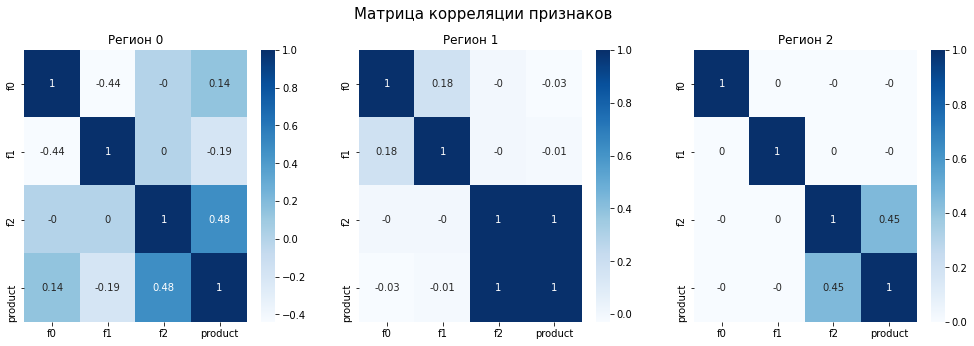

In [18]:
fig = plt.figure(figsize = (17, 5))
fig.suptitle('Матрица корреляции признаков', fontsize=15, y=1)

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

ax_1.set(title = 'Регион 0')
ax_2.set(title = 'Регион 1')
ax_3.set(title = 'Регион 2')

sbn.heatmap(corr_matrix_0, annot=True, cmap='Blues', ax=ax_1)
sbn.heatmap(corr_matrix_1, annot=True, cmap='Blues', ax=ax_2)
sbn.heatmap(corr_matrix_2, annot=True, cmap='Blues', ax=ax_3)

plt.show()

Наблюдаем:

1. в нулевом регионе:
    * среднюю отрицательную корреляцию между признаками `f0` и `f1`,
    * среднюю положительную корреляцию между признаком `f2` и объёмом запасов в скважине.
2. в первом регионе:
    * прямую зависимость объёма запасов в скважине от признака `f2`,
    * слабую положительную корреляцию между признаками `f0` и `f1`.
3. во втором регионе:
    * среднюю положительную корреляцию между признаком `f2` и объёмом запасов в скважине.
    
Поскольку сильной корреляции между признаками нет (только с целевым признаком), оставляем все признаки в работе.

### Объём запасов в скважине
Посмотрим на объёмы запасов в скважине по каждому региону. Для этого построим гистограмму "Объём запасов в скважине" (тыс.баррелей)

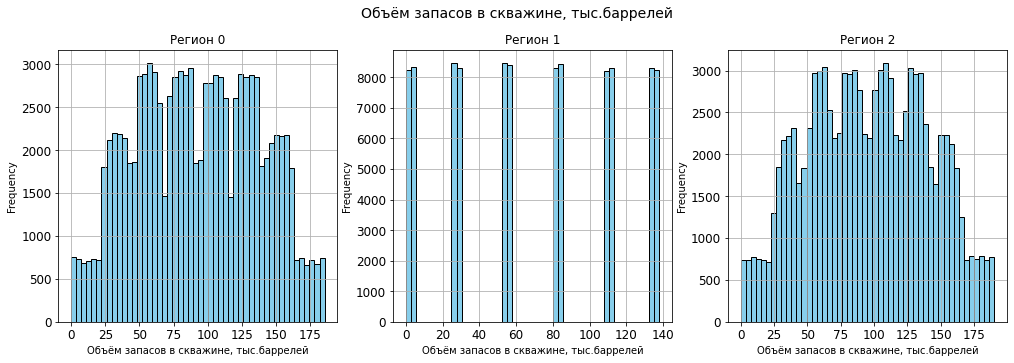

In [19]:
fig = plt.figure(figsize = (17, 5))
fig.suptitle('Объём запасов в скважине, тыс.баррелей', fontsize=14, y=1)

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

ax_1.set(xlabel = 'Объём запасов в скважине, тыс.баррелей')
ax_1.set(title = 'Регион 0')
ax_2.set(xlabel = 'Объём запасов в скважине, тыс.баррелей')
ax_2.set(title = 'Регион 1')
ax_3.set(xlabel = 'Объём запасов в скважине, тыс.баррелей')
ax_3.set(title = 'Регион 2')

df_0['product'].plot(kind='hist', grid=True, bins=50, color="skyblue", edgecolor="black", fontsize=12, ax=ax_1)
df_1['product'].plot(kind='hist', grid=True, bins=50, color="skyblue", edgecolor="black", fontsize=12, ax=ax_2)
df_2['product'].plot(kind='hist', grid=True, bins=50, color="skyblue", edgecolor="black", fontsize=12, ax=ax_3)

plt.show()

Как мы видим на графиках, в нулевом и втором регионах распределение близко к нормальному. В первом регионе данные распределены очень своеобразно и с практически равными интервалами. Также заметим, что в первом регионе больше скважин с нулевым запасом, по сравнению с нулевым и первым регионами.

### Вывод

В ходе подготовки данных мы удалили столбец с бесполезной информацией. Проверили данные на дубликаты и мультиколлинеарность факторов, оценили объёмы запасов в скважине в каждом регионе. Теперь данные готовы к дальнейшему анализу.

## Обучение и проверка модели

### Разделение исходных данных на выборки
Нам нужно построить модель для задачи регрессии. Для этого разделим исходные данные на выборки.

Для начала выделим в исходных данных:
* **признаки**: f0, f1, f2	 
* **целевой признак**: product

In [20]:
features_0 = df_0.drop(['product'], axis=1)
target_0 = df_0['product']

In [21]:
features_1 = df_1.drop(['product'], axis=1)
target_1 = df_1['product']

In [22]:
features_2 = df_2.drop(['product'], axis=1)
target_2 = df_2['product']

Разделим данные на обучающую и валидационную выборки в соотношении 75:25.

In [23]:
df_train_0, df_valid_0 = train_test_split(df_0, test_size=0.25, random_state=12345)
print('Размер обучающей выборки для нулевого региона', df_train_0.shape)
print('Размер валидационной выборки для нулевого региона', df_valid_0.shape)

Размер обучающей выборки для нулевого региона (75000, 4)
Размер валидационной выборки для нулевого региона (25000, 4)


In [24]:
df_train_1, df_valid_1 = train_test_split(df_1, test_size=0.25, random_state=12345)
print('Размер обучающей выборки для первого региона', df_train_1.shape)
print('Размер валидационной выборки для первого региона', df_valid_1.shape)

Размер обучающей выборки для первого региона (75000, 4)
Размер валидационной выборки для первого региона (25000, 4)


In [25]:
df_train_2, df_valid_2 = train_test_split(df_2, test_size=0.25, random_state=12345)
print('Размер обучающей выборки для второго региона', df_train_2.shape)
print('Размер валидационной выборки для второго региона', df_valid_2.shape)

Размер обучающей выборки для второго региона (75000, 4)
Размер валидационной выборки для второго региона (25000, 4)


Составим таблицы признаков и целевого признака для каждой выборки.

In [26]:
features_train_0 = df_train_0.drop(['product'], axis=1)
target_train_0 = df_train_0['product']
features_valid_0 = df_valid_0.drop(['product'], axis=1)
target_valid_0 = df_valid_0['product']

In [27]:
features_train_1 = df_train_1.drop(['product'], axis=1)
target_train_1 = df_train_1['product']
features_valid_1 = df_valid_1.drop(['product'], axis=1)
target_valid_1 = df_valid_1['product']

In [28]:
features_train_2 = df_train_2.drop(['product'], axis=1)
target_train_2 = df_train_2['product']
features_valid_2 = df_valid_2.drop(['product'], axis=1)
target_valid_2 = df_valid_2['product']

Мы разделили данные в каждом регионе по принципу 75/25:

1. обучение проведем на данных `df_train_0`, `df_train_1`, `df_train_2`;
2. проверку модели - на данных `df_valid_0`, `df_valid_1`, `df_valid_2`.

Напишем функцию для построения модели линейной регрессии (по условию задачи необходимо использовать именно эту модель, поскольку остальные недостаточно предсказуемые). Оценивать качество модели будем метрикой RMSE - квадратный корень из средней квадратичной ошибки.

In [29]:
def linreg (features_train, features_valid, target_train, target_valid):
    # инициализируем модель
    model_linreg = LinearRegression()
    # обучаем модель
    model_linreg.fit(features_train, target_train)
    # находим предсказания
    predictions = model_linreg.predict(features_valid)
    # находим средний запас предсказанного сырья
    predict_mean = predictions.mean()
    # находим значение MSE для линейной регрессии
    mse = mean_squared_error(target_valid, predictions) 
    
    print(f'Средний запас сырья по региону: {target_valid.mean():.3f} тыс.баррелей')
    print(f'Средний запас предсказанного сырья по региону: {predict_mean:.3f} тыс.баррелей')
    print(f'RMSE модели линейной регрессии: {mse ** 0.5:.3f} тыс.баррелей') 
    
    return predictions  

Сохраним предсказания на валидационной выборке в переменные `predictions_0`, `predictions_1`, `predictions_2`. Выведем на экран для каждого региона данные по среднему запасу сырья, среднему запасу предсказанного сырья и *RMSE* модели.

**Нулевой регион**

In [30]:
predictions_0 = linreg (features_train_0, features_valid_0, target_train_0, target_valid_0)

Средний запас сырья по региону: 92.079 тыс.баррелей
Средний запас предсказанного сырья по региону: 92.593 тыс.баррелей
RMSE модели линейной регрессии: 37.579 тыс.баррелей


**Первый регион**

In [31]:
predictions_1 = linreg (features_train_1, features_valid_1, target_train_1, target_valid_1)

Средний запас сырья по региону: 68.723 тыс.баррелей
Средний запас предсказанного сырья по региону: 68.729 тыс.баррелей
RMSE модели линейной регрессии: 0.893 тыс.баррелей


**Второй регион**

In [32]:
predictions_2 = linreg (features_train_2, features_valid_2, target_train_2, target_valid_2)

Средний запас сырья по региону: 94.884 тыс.баррелей
Средний запас предсказанного сырья по региону: 94.965 тыс.баррелей
RMSE модели линейной регрессии: 40.030 тыс.баррелей


### Вывод

По нулевому региону средний объём запасов предсказанного сырья почти совпадает с фактическим средним объёмом запасов сырья, модель ошибается почти на 38 тыс.баррелей.

Для первого региона предсказания модели получились самые точные - модель ошибается на ~890 баррелей.

Самая низкая точность модели на данных второго региона - ошибка в 40 тыс.баррелей.

## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек (сохраним в переменную `total_points`), из которых с помощью машинного обучения выбирают  
200 лучших для разработки (сохраним в переменную `best_points`).
Бюджет на разработку скважин в регионе — 10 млрд рублей (сохраним  
в переменную `budget`).
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет  
450 тыс. рублей (сохраним в переменную `income`), поскольку объём указан в тысячах баррелей.

In [33]:
TOTAL_POINTS = 500
BEST_POINTS = 200
BUDGET = 10000000000
INCOME = 450000

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Для этого сначала посчитаем необходимый бюджет для разработки одной скважины:

In [34]:
one_point_budget = BUDGET/BEST_POINTS
print('Бюджет для разработки новой скважины составляет', one_point_budget, 'руб.')

Бюджет для разработки новой скважины составляет 50000000.0 руб.


Теперь разделим полученный бюджет, необходимый для разразобтки одной скважины, на доход с каждой единицы продукта.

In [35]:
min_product_quantity = one_point_budget/INCOME
print(f'Минимальный объём сырья для безубыточной разработки новой скважины составляет {min_product_quantity:.3f} тыс.баррелей')

Минимальный объём сырья для безубыточной разработки новой скважины составляет 111.111 тыс.баррелей


Средние запасы во всех трёх регионах меньше необходимого минимального объёма сырья для безубыточной разработки новой скважины.

### Вывод

На этапе подготовки к расчёту прибыли мы:
* рассчитали необходимый бюджет для разработки одной скважины: 50 млн.руб.
* посчитали, что для безубыточной разработки новой скважины, минимальный объём сырья составляет ~111 тыс. баррелей.
* сравнили средние запасы сырья в каждом регионе с полученным минимальным объёмом. Получается, что для безубыточной разработки новой скважины средних запасов сырья в регионах не хватает, необходимо исследовать наиболее перспективные скважины.

## Расчёт прибыли и рисков 

### Функция для расчета прибыли по выбранным скважинам и предсказаниям модели

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

Выберем скважины с максимальными значениями предсказаний.  
Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.  
Рассчитаем прибыль для полученного объёма сырья.

In [36]:
target_valid_0 = target_valid_0.reset_index(drop=True)
target_valid_1 = target_valid_1.reset_index(drop=True)
target_valid_2 = target_valid_2.reset_index(drop=True)
predictions_0 = pd.Series(predictions_0)
predictions_1 = pd.Series(predictions_1)
predictions_2 = pd.Series(predictions_2)

In [37]:
def profit_calculation (target, predictions, count):
    preds_sorted = predictions.sort_values(ascending=False)
    selected = target[preds_sorted.index][:count]
    return ((INCOME * selected.sum()) - BUDGET)/10**6

In [38]:
revenue_0 = profit_calculation (target_valid_0, predictions_0, BEST_POINTS)
print('Прибыль для полученного объёма сырья нулевого региона:', revenue_0.round(2), 'млн.руб.')

Прибыль для полученного объёма сырья нулевого региона: 3320.83 млн.руб.


In [39]:
revenue_1 = profit_calculation (target_valid_1, predictions_1, BEST_POINTS)
print('Прибыль для полученного объёма сырья первого региона:', revenue_1.round(2), 'млн.руб.')

Прибыль для полученного объёма сырья первого региона: 2415.09 млн.руб.


In [40]:
revenue_2 = profit_calculation (target_valid_2, predictions_2, BEST_POINTS)
print('Прибыль для полученного объёма сырья второго региона:', revenue_2.round(2), 'млн.руб.')

Прибыль для полученного объёма сырья второго региона: 2710.35 млн.руб.


### Bootstrap

Применим технику *Bootstrap* с 1000 выборок, чтобы найти распределение прибыли.  
Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [41]:
def risk_and_revenue (target, predictions):
    state = np.random.RandomState(12345)
    profit_values = []
    for i in range(1000):
        target_sample = target.sample(n=500, replace=True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        profit_values.append(profit_calculation(target_sample,  predictions_sample, 200))
    profit_values = pd.Series(profit_values)
    mean = profit_values.mean()
    lower = profit_values.quantile(0.025)
    upper = profit_values.quantile(0.975)
    risk_of_loss = (profit_values < 0).mean()
    print('Средняя прибыль составляет', mean.round(2), 'млн.руб.')
    print('95%-й доверительный интервал от', lower.round(2), 'до', upper.round(2), 'млн.руб.')
    print(f'Риск убытков: {risk_of_loss:.2%}')
    return profit_values, lower, upper

**Нулевой регион**

In [42]:
profit_values_0, lower_0, upper_0 = risk_and_revenue (target_valid_0, predictions_0)

Средняя прибыль составляет 425.94 млн.руб.
95%-й доверительный интервал от -102.09 до 947.98 млн.руб.
Риск убытков: 6.00%


Построим гистограмму "Распределение прибыли для нулевого региона", для наглядности отметим границы доверительного интервала.

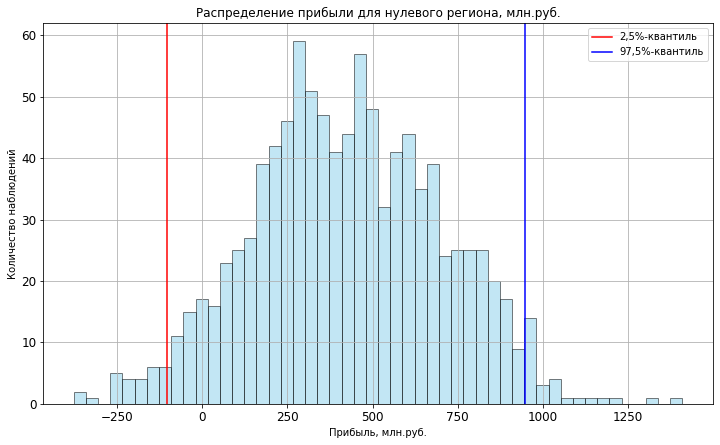

In [43]:
profit_values_0.plot(kind='hist', 
                     title='Распределение прибыли для нулевого региона, млн.руб.', 
                     alpha=.5, 
                     grid=True, 
                     bins=50, 
                     color="skyblue", 
                     figsize=(12,7), 
                     edgecolor="black", 
                     fontsize=12)

plt.xlabel('Прибыль, млн.руб.')
plt.ylabel('Количество наблюдений')
plt.axvline(x=lower_0, color='r')
plt.axvline(x=upper_0, color='b')
plt.legend(['2,5%-квантиль', '97,5%-квантиль'], loc=1)
plt.show()

**Первый регион**

In [44]:
profit_values_1, lower_1, upper_1 = risk_and_revenue (target_valid_1, predictions_1)

Средняя прибыль составляет 515.22 млн.руб.
95%-й доверительный интервал от 68.87 до 931.55 млн.руб.
Риск убытков: 1.00%


Построим гистограмму "Распределение прибыли для первого региона", для наглядности отметим границы доверительного интервала.

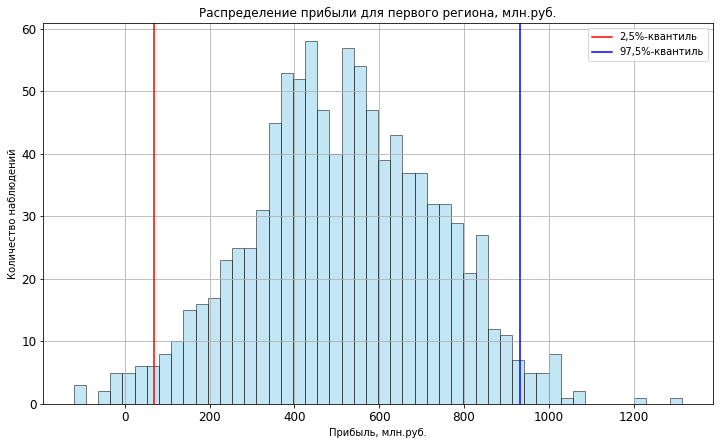

In [45]:
profit_values_1.plot(kind='hist', 
                     title='Распределение прибыли для первого региона, млн.руб.', 
                     alpha=.5, 
                     grid=True, 
                     bins=50, 
                     color="skyblue", 
                     figsize=(12,7), 
                     edgecolor="black", 
                     fontsize=12)

plt.xlabel('Прибыль, млн.руб.')
plt.ylabel('Количество наблюдений')
plt.axvline(x=lower_1, color='r')
plt.axvline(x=upper_1, color='b')
plt.legend(['2,5%-квантиль', '97,5%-квантиль'], loc=1)
plt.show()

**Второй регион**

In [46]:
profit_values_2, lower_2, upper_2 = risk_and_revenue (target_valid_2, predictions_2)

Средняя прибыль составляет 435.01 млн.руб.
95%-й доверительный интервал от -128.88 до 969.71 млн.руб.
Риск убытков: 6.40%


Построим гистограмму "Распределение прибыли для второго региона", для наглядности отметим границы доверительного интервала.

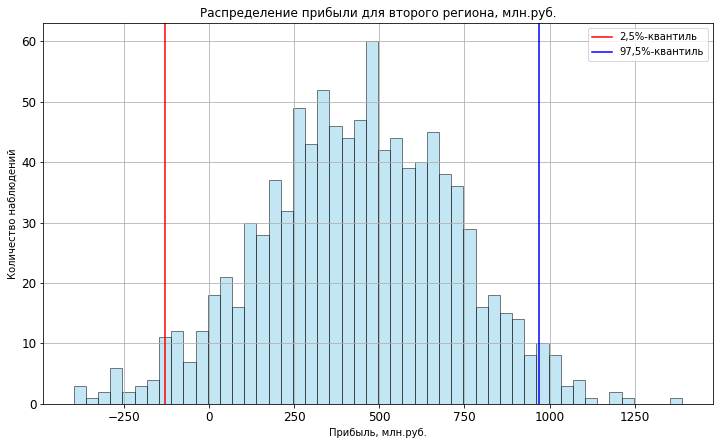

In [47]:
profit_values_2.plot(kind='hist', 
                     title='Распределение прибыли для второго региона, млн.руб.', 
                     alpha=.5, 
                     grid=True, 
                     bins=50, 
                     color="skyblue", 
                     figsize=(12,7), 
                     edgecolor="black", 
                     fontsize=12)

plt.xlabel('Прибыль, млн.руб.')
plt.ylabel('Количество наблюдений')
plt.axvline(x=lower_2, color='r')
plt.axvline(x=upper_2, color='b')
plt.legend(['2,5%-квантиль', '97,5%-квантиль'], loc=1)
plt.show()

По условию задачи, мы оставляем регионы, в которых вероятность убытков меньше 2,5%. Только первый регион, в котором риск убытков составляет 1%, соответствует поставленной задаче. Максимальную среднюю прибыль (~515 млн.руб.) прогнозируем также в первом регионе.

Также на графиках видим подтверждение, что только один регион с положительной левой границей 95%-го доверительного интервала соответствует условию задачи о минимальной вероятности убытков. В нулевом и втором регионах левые границы доверительных интервалов - отрицательные.

### Вывод

Все три региона можем назвать прибыльными по рассчитанной средней прибыли:
* в нулевом регионе ~426 млн.руб.
* в первом регионе ~ 515 млн.руб.
* во втором регионе ~ 435 млн.руб.

Вероятность убытков по условию задачи должна быть меньше 2,5%. Из-за высокого риска убытков (более 6%) мы отсеиваем нулевой и второй регионы, поэтому остается только первый регион с риском убытков всего 1%.  

Кроме того, первый регион соответствует 95%-му доверительному с положительными границами.

## Общий вывод

Объект нашего исследования - геологоразведки трёх регионов.

В ходе предобработки мы подготовили данные к моделированию:
* удалили в каждом датафрейме столбцы с бесполезной информацией,
* проверили данные на дубликаты,
* провели корреляционный анализ факторов - сильной взаимосвязи между признаками не выявили,
* оценили объёмы запасов в скважине в каждом регионе. 

Для решения поставленной задачи мы разделили исходные данные на три выборки:
1. обучающую,
2. валидационную.

Обучили и проверили модель линейной регрессии для каждого регионе. Средний запас предсказанного сырья почти совпадает с фактическим по каждому региону. Самые точные предсказания объёмов сырья получили для первого региона.
 
На этапе подготовки к расчёту прибыли мы:
* посчитали необходимый бюджет для разработки одной скважины: 50 млн.руб.,
* вычислили минимальный объём сырья для безубыточной разработки новой скважины: 111.111 тыс.баррелей,
* сравнили полученный объём сырья со средним запасом в каждом регионе - для безубыточной разработки новой скважины средних запасов сырья в регионах не хватает, необходимо исследовать наиболее перспективные скважины.

Мы написали функцию для расчёта прибыли по скважинам с максимальными значениями предсказаний. С применением техники *Bootstrap* мы посмотрели на распределение прибыли, вычислили среднюю прибыль, 95%-й доверительный интервал и риск убытков. На основе полученных результатов все три региона можем называть прибыльными по средней прибыли.

Подведём итог нашей работы - рекомендация для добывающей компании "ГлавРосГосНефть":
* для разработки скважин выбрать первый регион, в котором самая большая средняя прибыль (~515 млн.руб.) и минимальный риск убытков - всего 1%. 